# FINAL PROJECT - HEART FAILURE PREDICTION

# About this Dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Feature Descriptions

Age : age [years]

anaemia : Decrease of red blood cells or hemoglobin (boolean)

creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)

diabetes : If the patient has diabetes (boolean)

ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure : If the patient has hypertension (boolean)

platelets : Platelets in the blood (kiloplatelets/mL)

serum_creatinine : Level of serum creatinine in the blood (mg/dL)

serum_sodium : Level of serum sodium in the blood (mEq/L)

sex : Woman or man (binary)

smoking : If the patient smokes or not (boolean)

time : Follow-up period (days)

DEATH_EVENT : If the patient deceased during the follow-up period (boolean). This will be our Dependent Variable.

### Data Retrieving

In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
import random

In [2]:
data = pd.read_csv('Downloads/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### EDA & Data Cleaning

In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Note: as shown above there are no null values in our dataset!

In [5]:
data.shape

(299, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.columns.to_list()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [8]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [9]:
#Dividing features into numerical and categorical
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 2:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


In [10]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df = data.copy(deep = True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0


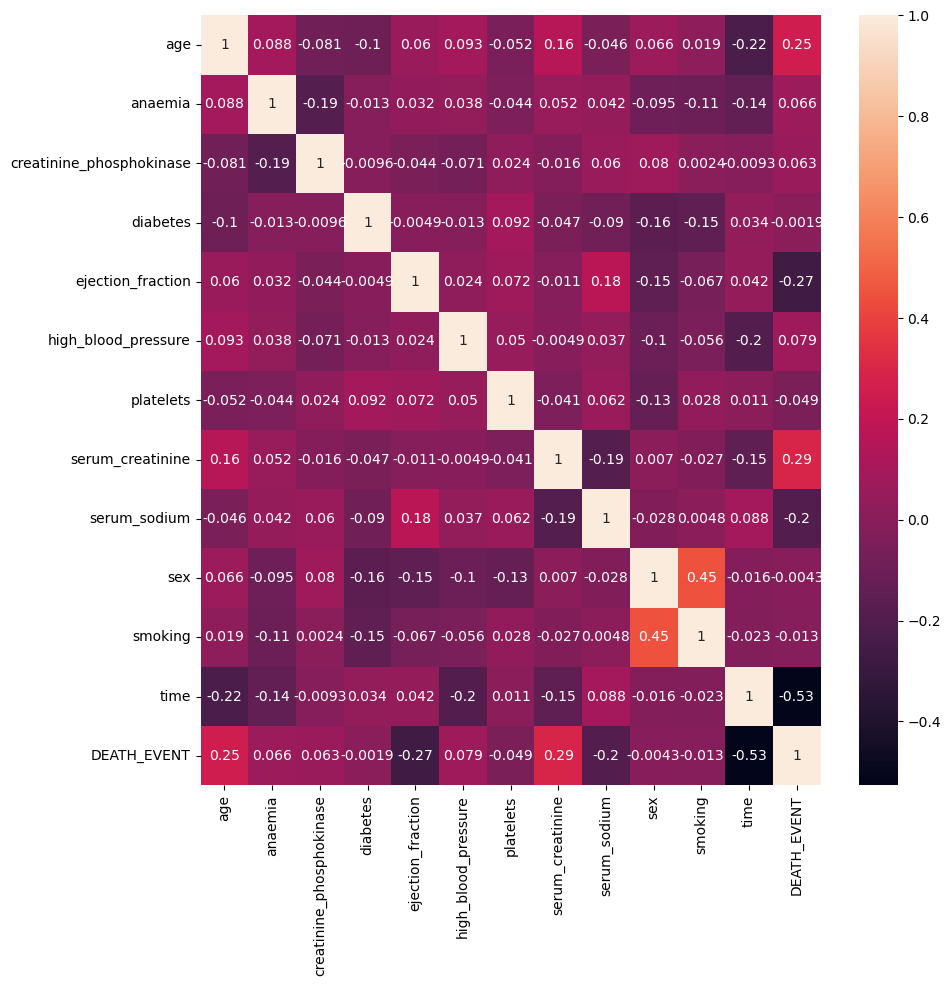

In [11]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()


#### Observations

There is nothing to conclude from categorical features correlation matrix.
From the correlation matrix for numerical features, time is inversely correlated to death. Thus patients with less follow up time are prone to heart failure.
Based on EDA, features such as anaemia, diabetes, age, sex, smoking are less contributing.

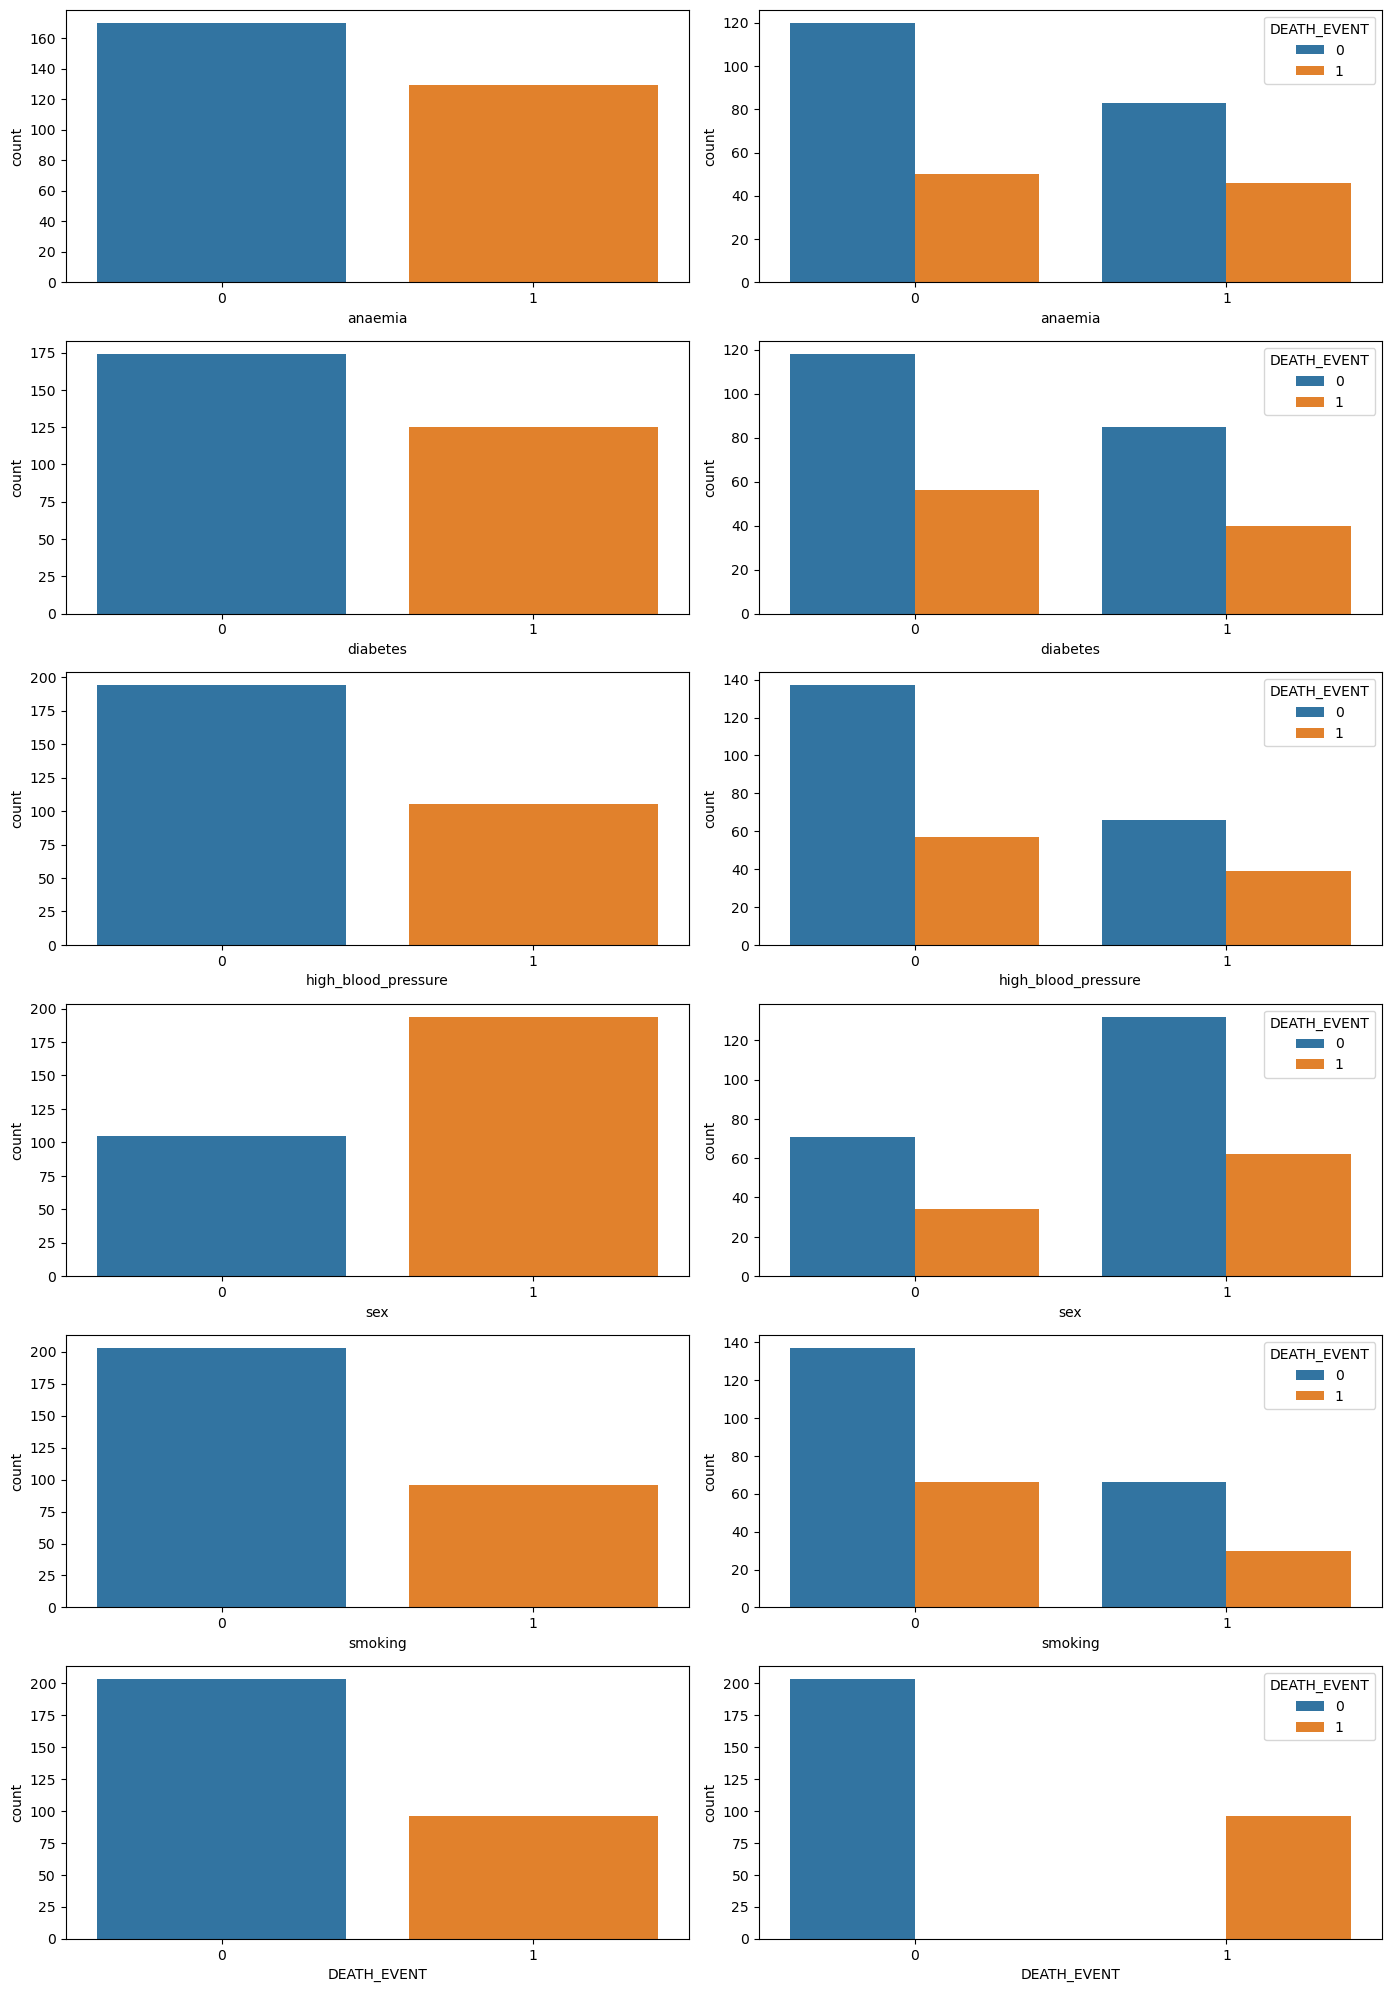

In [12]:
fig, ax = plt.subplots(len(categorical_features), 2, figsize=(14,20))

for i in range(len(categorical_features)):
    sns.countplot(ax=ax[i, 0], x=categorical_features[i], data=df)
    sns.countplot(ax=ax[i, 1], x=categorical_features[i], hue='DEATH_EVENT', data=df)
fig.tight_layout(pad=1)
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

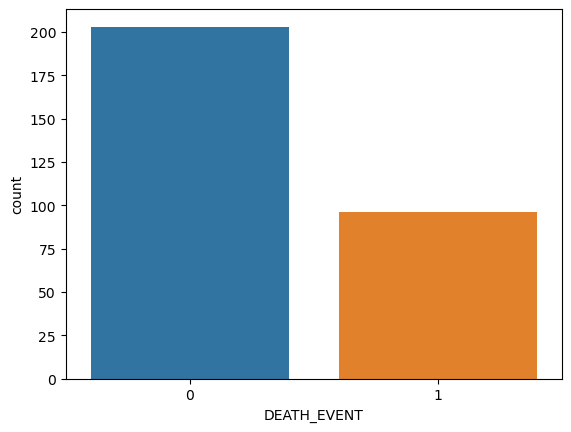

In [13]:
sns.countplot(x='DEATH_EVENT', data=df)

Observations

There is an imbalance with the target variable, so we can apply cross validation technique with over sampling method compared to under sampling as the data size is small.

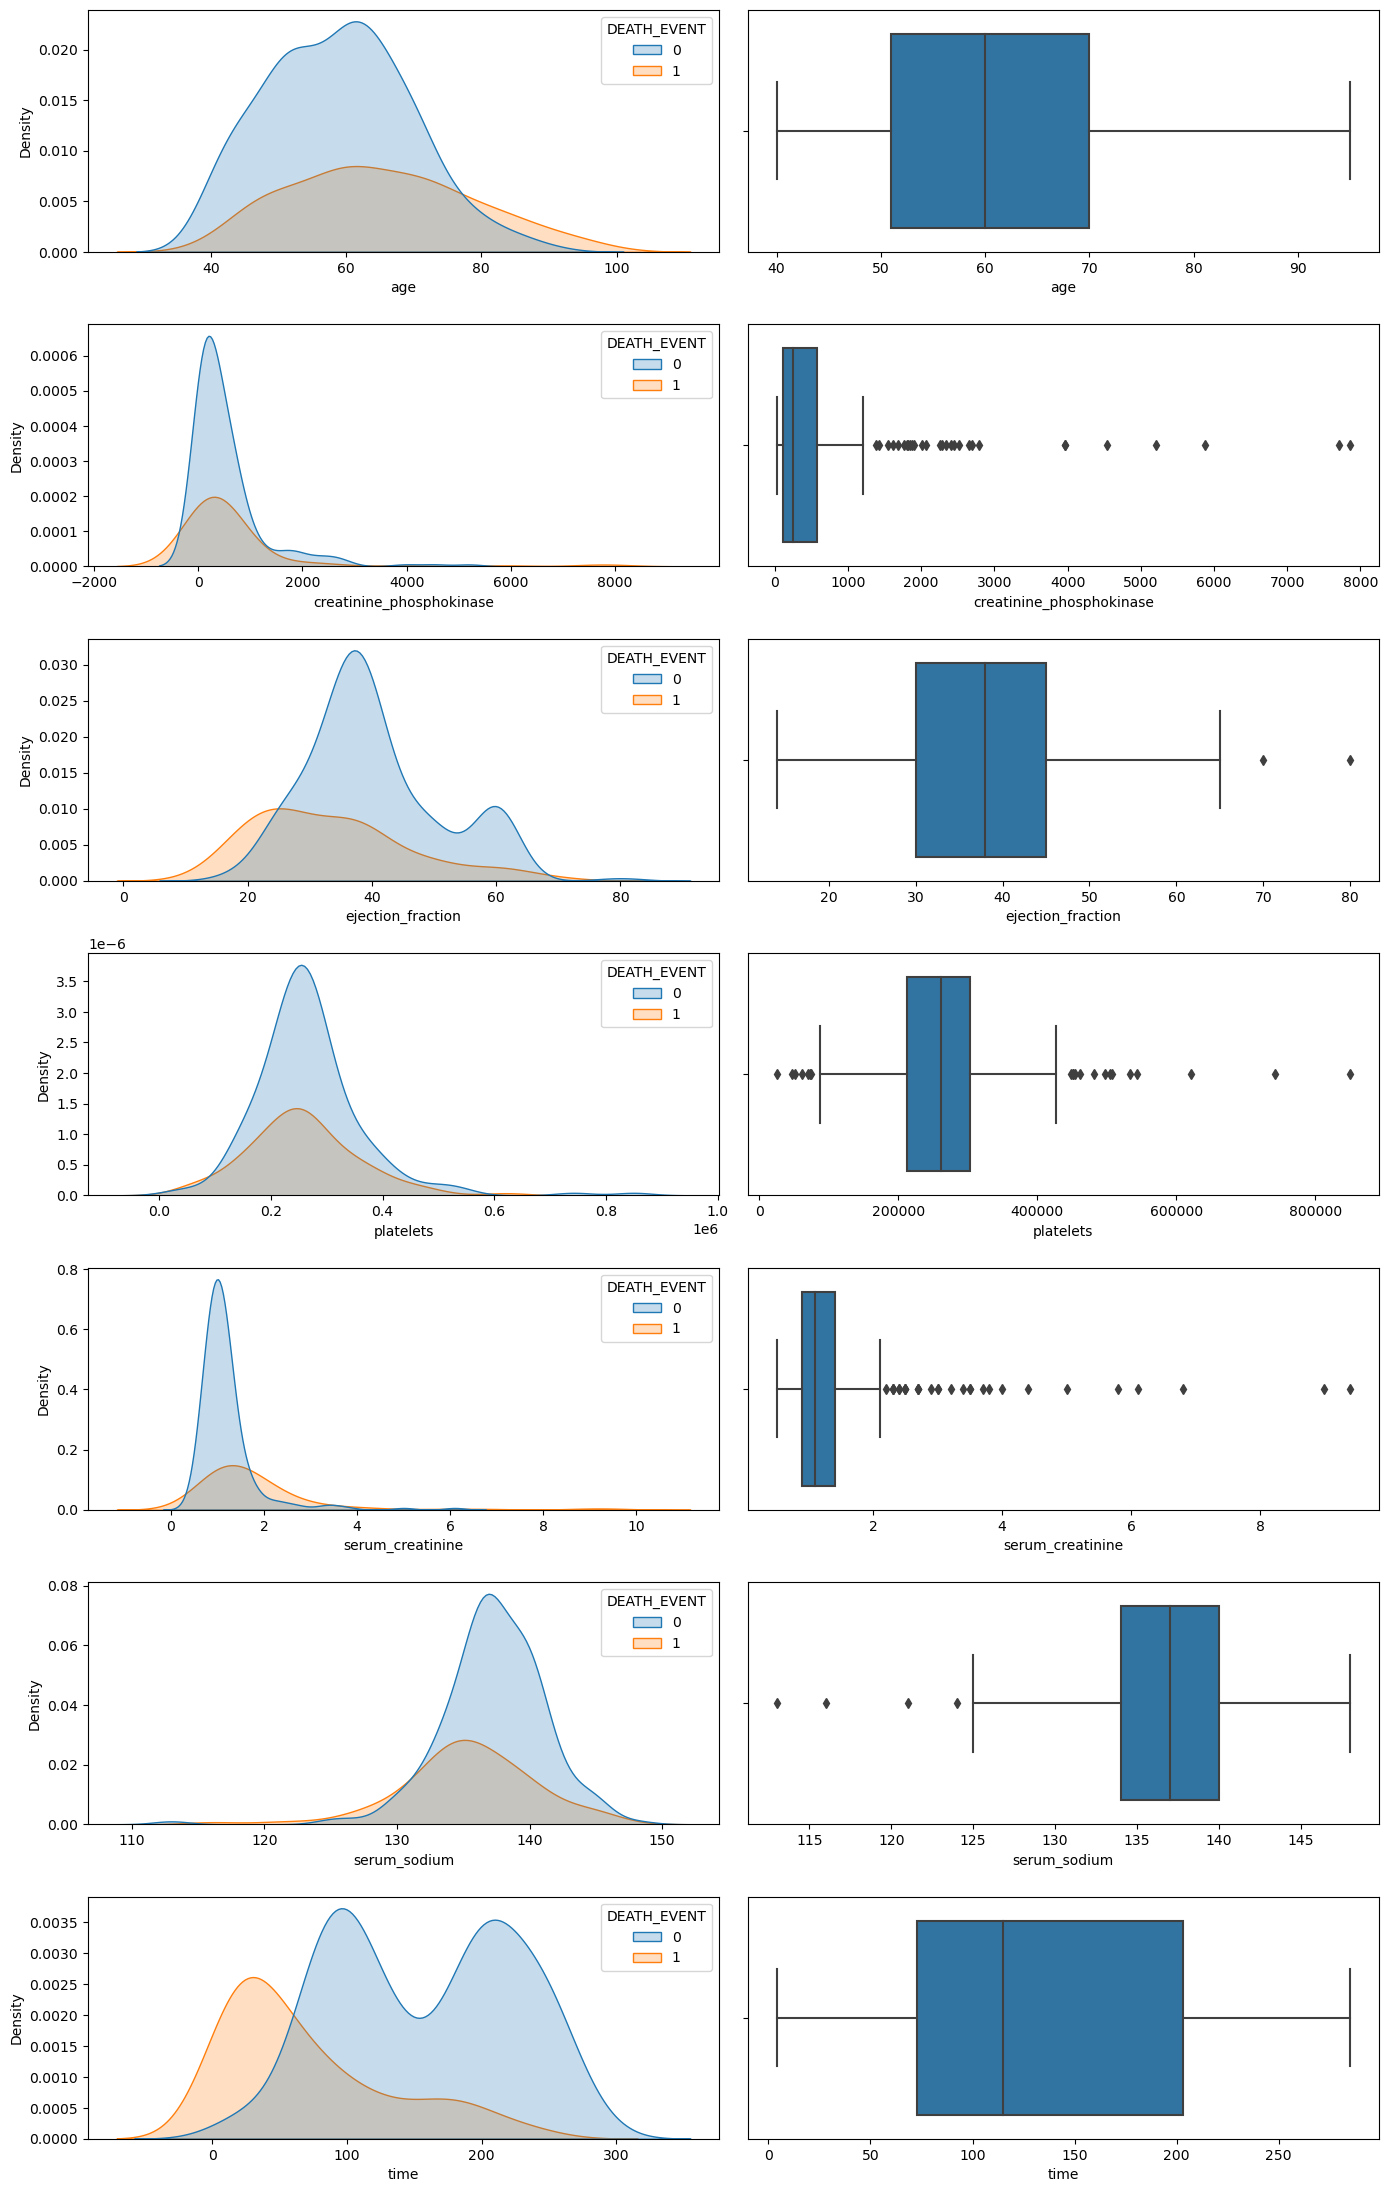

In [14]:
fig, ax = plt.subplots(len(numerical_features), 2, figsize=(14,22))

for i in range(len(numerical_features)):
    sns.kdeplot(ax=ax[i, 0], x=numerical_features[i], hue='DEATH_EVENT', data=df, fill = True)
    sns.boxplot(ax=ax[i, 1], x=numerical_features[i], data=df)
fig.tight_layout(pad=1)
plt.show()

### Observations

* No missing values present in the data.
* From the correlation matrix for continuous features, time is inversely correlated to death. Thus patients with less follow up time are prone to heart failure.
* Smoking and Sex features are slightly correlated.
* Based on EDA, features such as anaemia, diabetes, age, sex, smoking are less contributing.
* There is an imbalance with the target variable, so we can apply cross validation technique with over sampling method compared to under sampling as the data size is small.
* creatinine_phosphokinase, serum_creatinine and serum_sodium are highly skewed.
* From KDE Plots and boxplots, we can find that there are outliers in the data.
* creatinine_phosphokinase, serum_creatinine contains many outliers and can be treated using IQR Formula.

## Hypothesis Testing

#### Hypothesis 1

**alpha =0.05**

**Null Hypothesis (H01):** There is no relation between smoking and sex.

**Alternate Hypothesis (Ha1):** There is a relationship between the means of smoking and sex of patient as it is a observation of EDA.

In [15]:
t_score, p_val = stats.ttest_ind(df['smoking'], df['sex'])
print(t_score, p_val)

-8.47376579265773 1.8637689471019785e-16


In [16]:
dof = 25 + 25 - 2 # degree of freedom
t_dist = stats.t(dof)
print(2 * t_dist.cdf(t_score))

4.2756596819011004e-11


In [17]:
if p_val < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


#### Result: As p-value is less than 0.05, null hypothesis 1 is rejected. So there is a relationship between the means of smoking and sex of patient as it is a observation of EDA.

### Hypothesis 2

**Null Hypothesis (H02):** The mean age of the sample set is not equal from that of complete data.

**Alternate Hypothesis (Ha2):** The mean age of the sample set is almost equal to complete data.

In [18]:
sample_age_set = np.random.choice(list(df['age']), 20)

_, p_val = stats.ttest_1samp(sample_age_set, df['age'].mean())
print(p_val)

0.282528137071198


In [19]:
if p_val < 0.05:
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


#### Result: As p-value is more than 0.05, null hypothesis 2 is accepted. So the mean age of the sample set is not equal from that of complete data although its close enough.

In [20]:
print('Mean of complete data: ', np.mean(data['age']))
print('Mean of sample data: ', np.mean(sample_age_set))

Mean of complete data:  60.82943143812709
Mean of sample data:  63.8


### Hypothesis 3

**Null Hypothesis (H03):** There is a some connection between high BP and risk of heart failure as high BP stress on the heart functioning thus might affecting the patients predictions.

**Alternate Hypothesis (Ha3):** There is no relation between high BP and heart failure.

In [21]:
_, p_val = stats.ttest_ind(df['DEATH_EVENT'], df['high_blood_pressure'])
print(p_val)

0.43675818272737343


In [22]:
if p_val < 0.05:
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


#### Result: As p-value is greater than 0.05, null hypothesis 3 is accepted. So there is a some connection between high BP and risk of heart failure as high BP stress on the heart functioning thus might affecting the patients predictions.

## Future Scope
Will try out different classifiers and selecting one with highest recall score.
Recall represents the False Negative values which is very crucial in medical diagnosis.
As the dataset is imbalanced, need to tackle the major issue.
Alongwith that data rows are less, so will opt for oversampling or SMOTE or weighted class method.
Feature selection is also crucial as some features are proven to be more prominent based on EDA, thus contributing more rather than selecting and processing all.

## Conclusion
In this way, we have analysed the heart failure patient dataset, understanding the aspects of it. One more thing to observe is the data consists of time and death event variables. These variables are more important with repect to the survival model analysis. The same data can be used for survival analysis of the patients thus predicting the risk score and survival probability of the patient over the course of time.